# Project: Investigate a Dataset - [No-Show-Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>

Question 1: Did the younger patients turn up more than the older ones? What proportion showed up for the appointment?

Question 2: Did the numer of sms received determine the overall high turn up rate?




<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this section, I will be analyzing the information gathered from 100 thousand medical appointments in Brazil and it is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row as listed below: {source- https://www.kaggle.com/joniarroba/noshowappointments}

'ScheduledDay' The day someone called or registered the appointment, this is before appointment of course.

'Neighborhood' indicates the location of the hospital.

'Scholarship' indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família (True or False).

'No-Show' indicates whether or not the patient showed up to their appointment (True or False).

'AppointmentDay' The day of the actual appointment, when they have to visit the doctor.

'Age' shows how old the patient is

'Gender' tells us the sex of patient, whether male or female

'PatientId' shows the patient's unique identification

'AppointmentID' shows the appointment identification

'Hipertension' tells if the patient is hypertensive (True or False).

'Alcoholism' tells if the patient is alcoholic (True or False).

'Diabetes' tells if the patient is diabetic (True or False).

'Handcap' indicated if a patient is handicaped (True or False).

'SMS_received' 1 or more messages sent to the patient.

### Question(s) for Analysis

In this dataset, I will analyze the 'No Show Medical Appointment' dataset from Kaggle (link to dataset above).
My analysis will answer the following questions:

1. Did the younger patients turn up more than the older ones? What proportion showed up for the appointment?

2. Did the numer of sms received determine the overall high turn up rate?


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 1.3MB/s ta 0:00:011  9% |███                             | 983kB 12.3MB/s eta 0:00:01    14% |████▊                           | 1.5MB 13.6MB/s eta 0:00:01    20% |██████▋                         | 2.2MB 12.9MB/s eta 0:00:01    31% |██████████▏                     | 3.3MB 11.1MB/s eta 0:00:01    37% |████████████                    | 4.0MB 11.5MB/s eta 0:00:01    43% |██████████████                  | 4.5MB 11.6MB/s eta 0:00:01    54% |█████████████████▍              | 5.7MB 13.1MB/s eta 0:00:01    71% |██████████████████████▉         | 7.5MB 12.9MB/s eta 0:00:01    77% |████████████████████████▊       | 8.1MB 11.7MB/s eta 0:00:01    93% |██████████████████████████████  | 9.8MB 11.1MB/s eta 0:00:01    99% |███████████████████████████████▊| 10.4MB 12.3MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 1.2MB/s eta 0:00:01  4% |█▎                              | 552kB 13.6MB/s eta 0:00:01    8% |██▊                         

I successfully upgraded pandas-0.25.0

In [16]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('no_show_appointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [17]:
# To get the number of rows and columns of the dataset 
df.shape

(110527, 14)

Apparently, there are 110527 patients and 14 columns in this dataset

In [18]:
sum(df.duplicated())

0

Interesting! this seams to be a good one since the dataset has no duplicate. But to clear my curiosity, I need to know which of the columns was the dependent one used to determine if the entire set was duplicated. What comes to my head is either the patient_id or appointment_id since they are expected to be unique identification numbers for each patient.

In [19]:
print(sum(df.PatientId.duplicated()))
print(sum(df.AppointmentID.duplicated()))

48228
0


AppointmentID has no duplicate which makes it the indepedent column

PatientId however, shows 48228. Hmmmm, now this makes sense because one patient can book one or more appointments with the same identification number, thus making PatientId have duplicates.

In [20]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

I can see some errors in the column names, which I will highlight below:

* The names are a mixture of CamelCase and snakecase. I will correct them accordingly since texts in python should be lower case and snake case

* The 'No-show' carries '-' instead of underscore '_'. This would be changed

* We also have incorrect spelling of 'Hipertension' and 'Handcap' instead of 'Hypertension' and 'Handicap'. I will definately have this fixed.

In [21]:
# correcting the columns
df.rename(columns=lambda x: x.replace('-', '_').lower(), inplace=True)

In [22]:
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

In [23]:
df.rename(columns=lambda x: x.replace('id', '_id'), inplace=True)
df.rename(columns=lambda x: x.replace('day', '_day'), inplace=True)

In [24]:
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no_show'],
      dtype='object')

In [25]:
df.rename(columns={'handcap': 'handicap'}, inplace=True)
df.rename(columns={'hipertension': 'hypertension'}, inplace=True)

In [26]:
# confirming the entire columns
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show'],
      dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null float64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null object
appointment_day    110527 non-null object
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


I can notice some data types are faulty

* Firstly, patient_id contains decimal points (float64), which should be corrected to integer numbers for easy display

* Also the scheduled_day and appointment_day are object types. This should be converted to datetime

* According to the data source (Kaggle), there are a number of boolean data types, namely: hypertension, alcoholism, diabetes, handicap, scholarship, no_show. This is contrary to what we have above as int64, int64, int64, int64, int64 and object respectively. A lot of work needs to be done to change these data types    

In [28]:
# I need to check the unique values for each of the boolean type datas. First, I need to create the function 'target_columns'
def target_columns():
    print(df.hypertension.unique(), '-----hypertension')
    print(df.alcoholism.unique(), '-----alcoholism')
    print(df.diabetes.unique(),'-----diabetes')
    print(df.handicap.unique(),'-----handicap')
    print(df.scholarship.unique(),'-----scholarship')
    print(df.no_show.unique(),'-----no_show')

target_columns()

[1 0] -----hypertension
[0 1] -----alcoholism
[0 1] -----diabetes
[0 1 2 3 4] -----handicap
[0 1] -----scholarship
['No' 'Yes'] -----no_show


To change each of the above variables to a boolean type, it is expected we have 2 unique numbers or entities, each representing either True or False. We have hypertension, alcoholism, diabetes and scholarship to be binary numbers, which makes it fit for conversion to boolean. Also, no_show can be considered fit too since it has 2 entities (Yes and No). I will therefore change all the variables to boolean data types, as described by Kaggle. [0 1] becomes [false true] and ['No' 'Yes'] becomes [false true]

But handicap seems to be faulty or incorrect, having 0 to 4 unique values. It is therefore assumed that the data recorded for 'handicap' is either incorrect or probably a mistake. I need to check other variables in the dataset to trace the fault or completely discard using the column (handicap) for my analysis, as this will affect my result. 


In [29]:
# checking sms_received
print(df.sms_received.unique(),'-----sms_received')

[0 1] -----sms_received


Although 'appointment_id', 'gender', 'age', 'neighbourhood' and 'sms_received' seems well represented, I suspect that sms_received may not be as accurate because the description says "1 or more messages sent to the patient", which means that a patient may receive more than 1 messages. The unique value above shows that the patients either got only 1 message or no message at all, which doesn't tally with the description.

Now comparing 'sms_received' with the faulty 'handicap' identified above, I can see that they both carry the information of one for the other, meaning that the columns may likely be swaped or interchanged unknowingly. On this note, instead of deleting both columns, I will rather rename the columns just to rule out the possibility of deleting a valid data.

In [30]:
# renaming sms_received and handicap columns
df.rename(columns={ 'sms_received': 'handicap', 'handicap': 'sms_received'}, inplace=True)
print(df.handicap.unique(), '-----handicap')
print(df.sms_received.unique(), '-----sms_received')

[0 1] -----handicap
[0 1 2 3 4] -----sms_received


Now this looks right! this shows that patients received 1 or more messages and 'handicap' is now fit to be converted to a boolean data type. Remember other columns with the boolean type I also mentioned above? It's time to convert all of them!

In [31]:
# converting all intended columns from integer to boolean data type
df.scholarship = df.scholarship.astype(bool)
df.hypertension = df.hypertension.astype(bool)
df.diabetes = df.diabetes.astype(bool)
df.alcoholism = df.alcoholism.astype(bool)
df.handicap = df.handicap.astype(bool)

In [32]:
# converting no_show column from object to boolean
df.no_show= df.no_show.map({'Yes': True, 'No': False})

In [33]:
# Confirming all the columns to be converted to boolean data type using the function 'target_columns'
target_columns()

[ True False] -----hypertension
[False  True] -----alcoholism
[False  True] -----diabetes
[False  True] -----handicap
[False  True] -----scholarship
[False  True] -----no_show


In [34]:
df.no_show.unique()

array([False,  True], dtype=bool)

In [35]:
# converting patient_id to integer
df.patient_id = df.patient_id.astype('int')
df.patient_id.head()

0     29872499824296
1    558997776694438
2      4262962299951
3       867951213174
4      8841186448183
Name: patient_id, dtype: int64

In [36]:
# converting scheduled_day and appointment_day to datetime
df.scheduled_day = pd.to_datetime(df.scheduled_day)
df.appointment_day = pd.to_datetime(df.appointment_day)

In [37]:
df[['scheduled_day', 'appointment_day']].head()

,scheduled_day,appointment_day
0,2016-04-29 18:38:08,2016-04-29
1,2016-04-29 16:08:27,2016-04-29
2,2016-04-29 16:19:04,2016-04-29
3,2016-04-29 17:29:31,2016-04-29
4,2016-04-29 16:07:23,2016-04-29


Apparently, the appointment day time are all 00:00:00, hence it did not appear. It's logical enough for 'appointment_day' not to have a time since we are considering just the day of the actual appointment.

In [38]:
# confirming all the column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null int64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null bool
hypertension       110527 non-null bool
diabetes           110527 non-null bool
alcoholism         110527 non-null bool
sms_received       110527 non-null int64
handicap           110527 non-null bool
no_show            110527 non-null bool
dtypes: bool(6), datetime64[ns](2), int64(4), object(2)
memory usage: 7.4+ MB


In [39]:
# Assigning the corrected dataset to a new name and then confirming it
edited_df= df
edited_df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,sms_received,handicap,no_show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,0,False,False
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,False
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,False
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,0,False,False
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,0,False,False


For the record, the no_show column is so tricky and quite complex to comprehend. One needs to be extra careful to interpret it to avoid a mixup. On this note, I will like to rename no_show to showed_up and then invert the data to make True to False and False to True. This is to avoid confusion.

In [40]:
# Now lets rename no_show column
df.rename(columns={ 'no_show': 'showed_up'}, inplace=True)

In [41]:
# Inverting the no_show column data
edited_df['showed_up'] = ~df.showed_up

In [42]:
df.showed_up.unique()

array([ True, False], dtype=bool)

In [43]:
# Saving the edited dataset
edited_df.to_csv('no_show_appointments_edited.csv', index= False)

In [44]:
# Lets see and confirm the final table outlook
df=pd.read_csv('no_show_appointments_edited.csv')
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,sms_received,handicap,showed_up
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29 00:00:00,62,JARDIM DA PENHA,False,True,False,False,0,False,True
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29 00:00:00,56,JARDIM DA PENHA,False,False,False,False,0,False,True
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29 00:00:00,62,MATA DA PRAIA,False,False,False,False,0,False,True
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29 00:00:00,8,PONTAL DE CAMBURI,False,False,False,False,0,False,True
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29 00:00:00,56,JARDIM DA PENHA,False,True,True,False,0,False,True


This looks all set!


### Data Cleaning
 

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null int64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null object
appointment_day    110527 non-null object
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null bool
hypertension       110527 non-null bool
diabetes           110527 non-null bool
alcoholism         110527 non-null bool
sms_received       110527 non-null int64
handicap           110527 non-null bool
showed_up          110527 non-null bool
dtypes: bool(6), int64(4), object(4)
memory usage: 7.4+ MB


In [46]:
# Now lets look at the general summary of the whole dataset
df. describe()

,patient_id,appointment_id,age,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.022248
std,2.560949e+14,7.129575e+04,23.110205,0.161543
min,3.921700e+04,5.030230e+06,-1.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,4.000000


Interesting! I can see a red flag already in the minimum age of -1, which is impossible to have. The minimum patient age should be zero (babies)

In [47]:
# We need to know how many rows that has ages below zero and drop it since it's an invalid age
sum(df.age < 0)

1

In [48]:
# So lets drop that single row
df.drop(df[df.age < 0].index, inplace=True)

In [49]:
df.describe()

,patient_id,appointment_id,age,sms_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.022248
std,2.560943e+14,7.129544e+04,23.110026,0.161543
min,3.921700e+04,5.030230e+06,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,4.000000


The result shows that the data consists of children aged 0 to the oldest adult aged 115years. Also a majority of the patients didnt reveive sms prior to their visit day at the hospital, with the maximum sms recived to be 4.

In [50]:
# I will have to drop patient_id and appointment_id since its not needed in the statistics
df.drop (['patient_id', 'appointment_id'], axis=1, inplace=True)
df.describe()

,age,sms_received
count,110526.000000,110526.000000
mean,37.089219,0.022248
std,23.110026,0.161543
min,0.000000,0.000000
25%,18.000000,0.000000
50%,37.000000,0.000000
75%,55.000000,0.000000
max,115.000000,4.000000


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Did the younger patients turn up more than the older ones? What proportion showed up for the appointment?

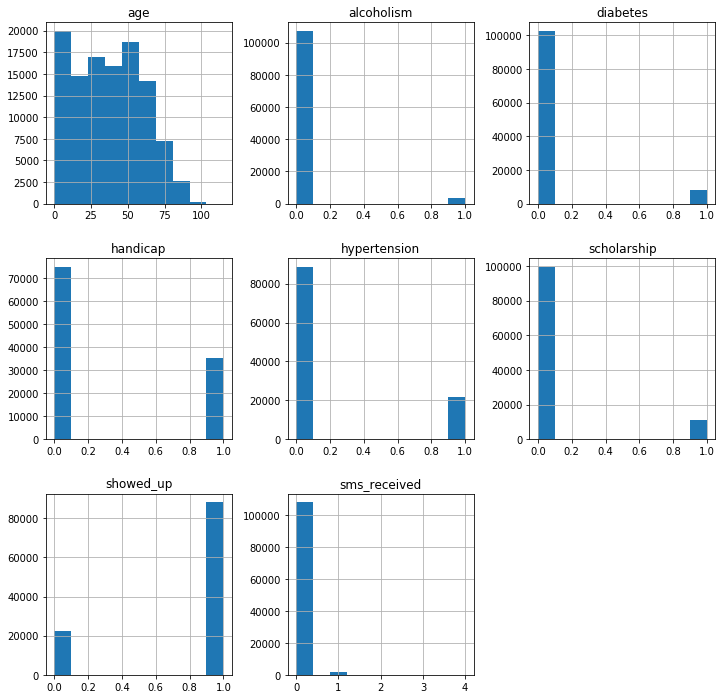

In [51]:
# Statistical distribution of the whole dataset
df.hist (figsize= (12,12));

Overall data distribution recorded that more people showed up for the appointment, with many of them not being in a scholarship nor received sms, more females patients than men, larger number of children than adults, low recorded ailments (including diabetes, hypertension, handicap and alcoholism) amongst the patients, and finally, high show up rate.

### 1. Did the younger patients turn up more than the older ones? What proportion showed up for the appointment?

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [53]:
# To know the number of patients for each age
df.age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
56     1635
38     1629
59     1624
2      1618
50     1613
57     1603
36     1580
51     1567
19     1545
39     1536
37     1533
54     1530
34     1526
33     1524
30     1521
6      1521
3      1513
17     1509
32     1505
5      1489
44     1487
18     1487
58     1469
46     1460
45     1453
       ... 
72      615
74      602
76      571
75      544
78      541
77      527
80      511
81      434
82      392
79      390
84      311
83      280
85      275
86      260
87      184
89      173
88      126
90      109
92       86
91       66
93       53
94       33
95       24
96       17
97       11
98        6
115       5
100       4
102       2
99        1
Name: age, Length: 103, dtype: int64

Patient's ages are somewhat large in number, about 103, which makes it difficult to analyze. Hence I intend to group these ages into 4:

children: age 0-18 years

young_adults: age 18-40 years

older_adults: age 40-70 years

seniors: age 70-115 years

In [54]:
bin_edges = [ 0, 18, 40, 70, 115]

In [55]:
bin_names = ['children', 'young_adults', 'older_adults', 'seniors']

In [56]:
# Creates age_range column
df['age_range'] = pd.cut(df['age'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df['age_range'].value_counts()

older_adults    41270
young_adults    31817
children        25327
seniors          8573
Name: age_range, dtype: int64

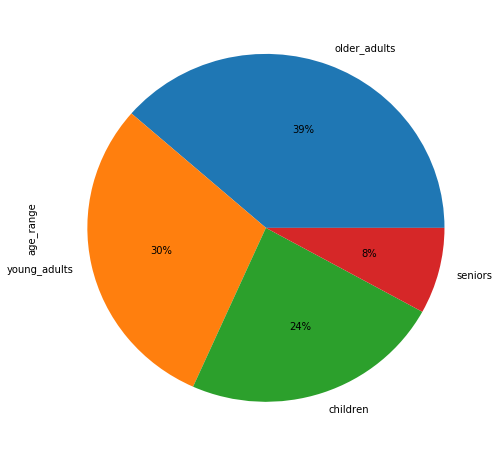

In [57]:
df.age_range.value_counts().plot(kind='pie', autopct= '%1.0f%%', figsize= (8,8));

In [58]:
age_distribution= df.groupby('age_range')['showed_up'].value_counts().unstack()
print(age_distribution)
print(age_distribution.sum())

showed_up     False  True 
age_range                 
children       5708  19619
young_adults   7375  24442
older_adults   7239  34031
seniors        1358   7215
showed_up
False    21680
True     85307
dtype: int64


In [59]:
percentage_age= age_distribution.apply(lambda x:(x/(x.sum())*100))
print (percentage_age)

showed_up         False      True 
age_range                         
children      26.328413  22.998113
young_adults  34.017528  28.651811
older_adults  33.390221  39.892389
seniors        6.263838   8.457688


Text(0,0.5,'percentage age')

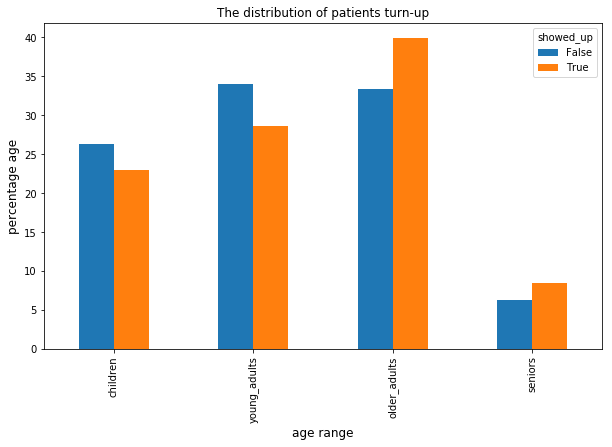

In [60]:
percentage_age.plot(kind='bar', figsize=(10,6), title='The distribution of patients turn-up');
plt.xlabel('age range', fontsize=12)
plt.ylabel('percentage age', fontsize=12)

### The statistics above shows that out of the total population,only 8,5307 of the patients showed up for the appointment while 21680 patients didnt show up. Of the 8,5307 that showed up, 39.89% of the older adults (40-70 years) had the highest turnup rate, followed by 28.65% of young adults (18-40 years), then 23% of children (below 18 years), and lastly just about 8.45% of seniors above 70years. 



### Research Question 2: Did the numer of sms received determine the overall high turn up rate?

In [61]:
df.sms_received.value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: sms_received, dtype: int64

Text(0,0.5,'count')

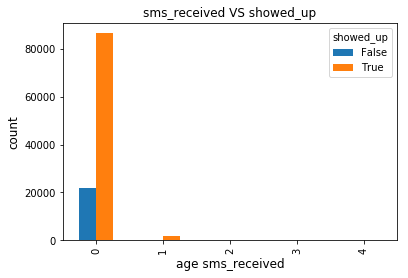

In [62]:
sms_distribution= df.groupby('sms_received')['showed_up'].value_counts().unstack()
sms_distribution.plot(kind='bar', title='sms_received VS showed_up');
plt.xlabel('age sms_received', fontsize=12)
plt.ylabel('count', fontsize=12)

### Apparently, patients that did not receive any sms  showed up the most, amounting to over 90% of the total turnups, while the least count was those that got up to 4 sms messages. The total show up reduced with increasing number of sms received, which therefore confirms that increasing sms does not determine the overall turn up rate.


<a id='conclusions'></a>
## Conclusions

### Question 1: The statistics above shows that out of the total population,only 8,5307 of the patients showed up for the appointment while 21680 patients didnt show up. Of the 8,5307 that showed up, 39.89% of the older adults (40-70 years) had the highest turnup rate, followed by 28.65% of young adults (18-40 years), then 23% of children (below 18 years), and lastly just about 8.45% of seniors above 70years.

### Question 2: Apparently, patients that did not receive any sms showed up the most, amounting to over 90% of the total turnups, while the least count was those that got up to 4 sms messages. The total show up reduced with increasing number of sms received, which therefore confirms that increasing sms does not determine the overall turn up rate

### One major limitation was the incorrect data encountered during data cleaning. I assumed that the sms_received and handicap columns were interchanged, and that was what I used for my analysis.

### I encountered an error data in the age (-1) of patient, which I droped.

### I made corrections and ajustments in the spellings and data types of the different columns.
